# **Health and Internet Data Trends in the USA.**

---
# **Processing Internet Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/DSA 210 Project Files/Health and Internet/internet data.xlsx'
df_internet = pd.read_excel(file_path, skiprows=4)

df_internet = df_internet.dropna(axis=1, how='all')

df_internet_melted = df_internet.melt(
    id_vars=['Country Name'],
    value_vars=[col for col in df_internet.columns if isinstance(col, int)],
    var_name='Year',
    value_name='Internet Users (%)'
)

# Convert Year to int
df_internet_melted['Year'] = df_internet_melted['Year'].astype(int)
df_internet_melted = df_internet_melted.drop(columns='Country Name')

# df_internet_melted

Mounted at /content/drive


---
# **Processing Obesity Data**

In [ ]:
file_path = '/content/drive/MyDrive/DSA 210 Project Files/Health and Internet/Obesity Data.xlsx'
df_obesity = pd.read_excel(file_path, skiprows=0)

df_obesity = df_obesity[df_obesity['location_level'] == 'Country']
df_obesity = df_obesity[df_obesity['sex'] == 'Both']
ages_to_exclude = ['2 to 14', '2 to 24', '5 to 14', '5 to 24']
df_obesity = df_obesity[~df_obesity['age_group'].isin(ages_to_exclude)]

df_obesity = df_obesity.groupby('year_id', as_index=False)['mean_count'].mean()
df_obesity =df_obesity[df_obesity['year_id'] <= 2025]


# df_obesity

---
# **Processing Mental Health Data**

In [ ]:
file_path = '/content/drive/MyDrive/DSA 210 Project Files/Health and Internet/mental health data.xlsx'
df_mental_h = pd.read_excel(file_path, skiprows=0)
df_mental_h = df_mental_h[(df_mental_h['age_name'] == 'All ages') & (df_mental_h['sex_name'] == 'Both')]
df_mental_h = df_mental_h.drop(columns= ['location_name','age_name','sex_name', 'location_id','metric_name', 'sex_id', 'cause_id', 'metric_id', 'age_id', 'measure_id', 'upper', 'lower'])

df_mental_h['cause_name'].unique()
df_mental_h

# DataFrame for Deaths
df_deaths = df_mental_h[df_mental_h['measure_name'] == 'Deaths']

# DataFrame for DALYs
df_dalys = df_mental_h[df_mental_h['measure_name'] == 'DALYs (Disability-Adjusted Life Years)']

# Pivot Deaths
df_deaths = df_deaths.pivot_table(
    index='year',
    columns='cause_name',
    values='val'
).reset_index()

# Pivot DALYs
df_dalys = df_dalys.pivot_table(
    index='year',
    columns='cause_name',
    values='val'
).reset_index()

---
# **Merging Health Data with Internet Data**

In [ ]:
# Rename 'Year' in the internet usage data to match DALYs data
df_internet_melted.rename(columns={'Year': 'year'}, inplace=True)

# Merge on 'year'
df_merged_dalys = pd.merge(df_dalys, df_internet_melted, on='year', how='inner')

# Rename 'Year' in the internet usage data to match DALYs data
df_internet_melted.rename(columns={'Year': 'year'}, inplace=True)

# Merge on 'year'
df_merged_deaths = pd.merge(df_deaths, df_internet_melted, on='year', how='inner')

df_merged_obesity = pd.merge(df_obesity, df_internet_melted, left_on='year_id', right_on='year')

df_merged_obesity.drop(columns=['year_id'], inplace=True)

In [ ]:
df_merged_dalys

,year,Anxiety disorders,Depressive disorders,Mental disorders,Other mental disorders,Substance use disorders,Internet Users (%)
0,1990,1.659310e+06,1.754893e+06,5.809208e+06,372764.317931,2.016714e+06,0.784729
1,1991,1.675131e+06,1.842610e+06,5.939092e+06,377784.988327,2.014652e+06,1.163194
2,1992,1.692415e+06,1.929784e+06,6.068738e+06,382451.963988,2.031636e+06,1.724203
3,1993,1.711056e+06,2.014037e+06,6.196162e+06,387008.851715,2.066097e+06,2.271673
4,1994,1.731959e+06,2.093022e+06,6.320293e+06,391556.931458,2.096279e+06,4.862781
5,1995,1.753958e+06,2.165738e+06,6.439933e+06,396298.923539,2.132314e+06,9.237088
6,1996,1.827200e+06,2.239764e+06,6.610633e+06,400969.360026,2.158673e+06,16.419353
7,1997,1.971370e+06,2.317922e+06,6.855446e+06,405612.354107,2.195056e+06,21.616401
8,1998,2.141032e+06,2.392493e+06,7.121761e+06,410043.358423,2.255206e+06,30.093197
9,1999,2.289477e+06,2.456676e+06,7.357337e+06,414402.894997,2.364124e+06,35.848724


In [ ]:
df_merged_deaths

,year,Mental disorders,Substance use disorders,Internet Users (%)
0,1990,19.760263,12968.978714,0.784729
1,1991,19.229506,13329.728140,1.163194
2,1992,21.234903,14022.755757,1.724203
3,1993,24.071744,15073.386289,2.271673
4,1994,25.837418,15918.254804,4.862781
5,1995,27.211779,16738.389236,9.237088
6,1996,30.063848,17182.215755,16.419353
7,1997,31.535161,17772.272983,21.616401
8,1998,32.559518,18796.434135,30.093197
9,1999,33.486812,20651.454849,35.848724


In [ ]:
df_merged_obesity

,mean_count,year,Internet Users (%)
0,1.830783e+07,1990,0.784729
1,1.934306e+07,1991,1.163194
2,2.046690e+07,1992,1.724203
3,2.166722e+07,1993,2.271673
4,2.292525e+07,1994,4.862781
5,2.426392e+07,1995,9.237088
6,2.564404e+07,1996,16.419353
7,2.702431e+07,1997,21.616401
8,2.843667e+07,1998,30.093197
9,2.984754e+07,1999,35.848724


# **Machine Learning Tasks**
## Internet and DALYs

# Regression Analysis: Internet Users (%) vs. Mental Health Disorder DALYs

## Key Results Summary
| Disorder Category         | Slope (Coefficient) | Intercept       | R-squared | MSE               | Interpretation Summary |
|---------------------------|---------------------|-----------------|-----------|-------------------|------------------------|
| **Anxiety Disorders**     | 7,193.46           | 1,753,718       | 0.648     | 2.72×10¹⁰         | Moderate positive link |
| **Depressive Disorders**  | 10,614.41          | 1,957,840       | 0.834     | 2.16×10¹⁰         | Strong positive link   |
| **All Mental Disorders**  | 24,125.28          | 6,129,229       | 0.883     | 7.50×10¹⁰         | Very strong link       |
| **Other Mental Disorders**| 1,381.80           | 372,679         | 0.905     | 1.95×10⁸          | Strongest explanatory power |
| **Substance Use Disorders**| 50,399.94        | 1,172,487       | 0.708     | 1.01×10¹²         | Large effect, high variance |

---

## Detailed Interpretation

### 1. **Direction and Magnitude of Effects**
- **All disorders show positive slopes**, indicating rising DALYs with increased Internet use.
- **Strongest absolute effects**:
  - Substance Use Disorders: +50,400 DALYs per 1% Internet increase
  - All Mental Disorders: +24,125 DALYs per 1% increase
- **Most sensitive category**: Substance Use Disorders (steepest slope)

### 2. Model Fit (R²)
- **Best explained**: Other Mental Disorders (R²=0.905)
- **Weakest fit**: Anxiety Disorders (R²=0.648)
- **Surprising insight**: Internet penetration explains >90% of variance for "Other Mental Disorders"

### 3. Prediction Error (MSE)
- **Highest uncertainty**: Substance Use Disorders (MSE=1.01×10¹²)
- **Most precise predictions**: Other Mental Disorders (MSE=1.95×10⁸)

---

## Policy Implications
 **Key Concern**: Every 10% Internet penetration increase associates with:
- +504,000 Substance Use Disorder DALYs
- +241,000 All Mental Disorder DALYs

**Recommended Actions**:
1. **Digital mental health interventions** for at-risk populations
2. **Regulate algorithmically-driven content** that may exacerbate disorders
3. **Monitor substance use trends** in high-Internet-usage demographics

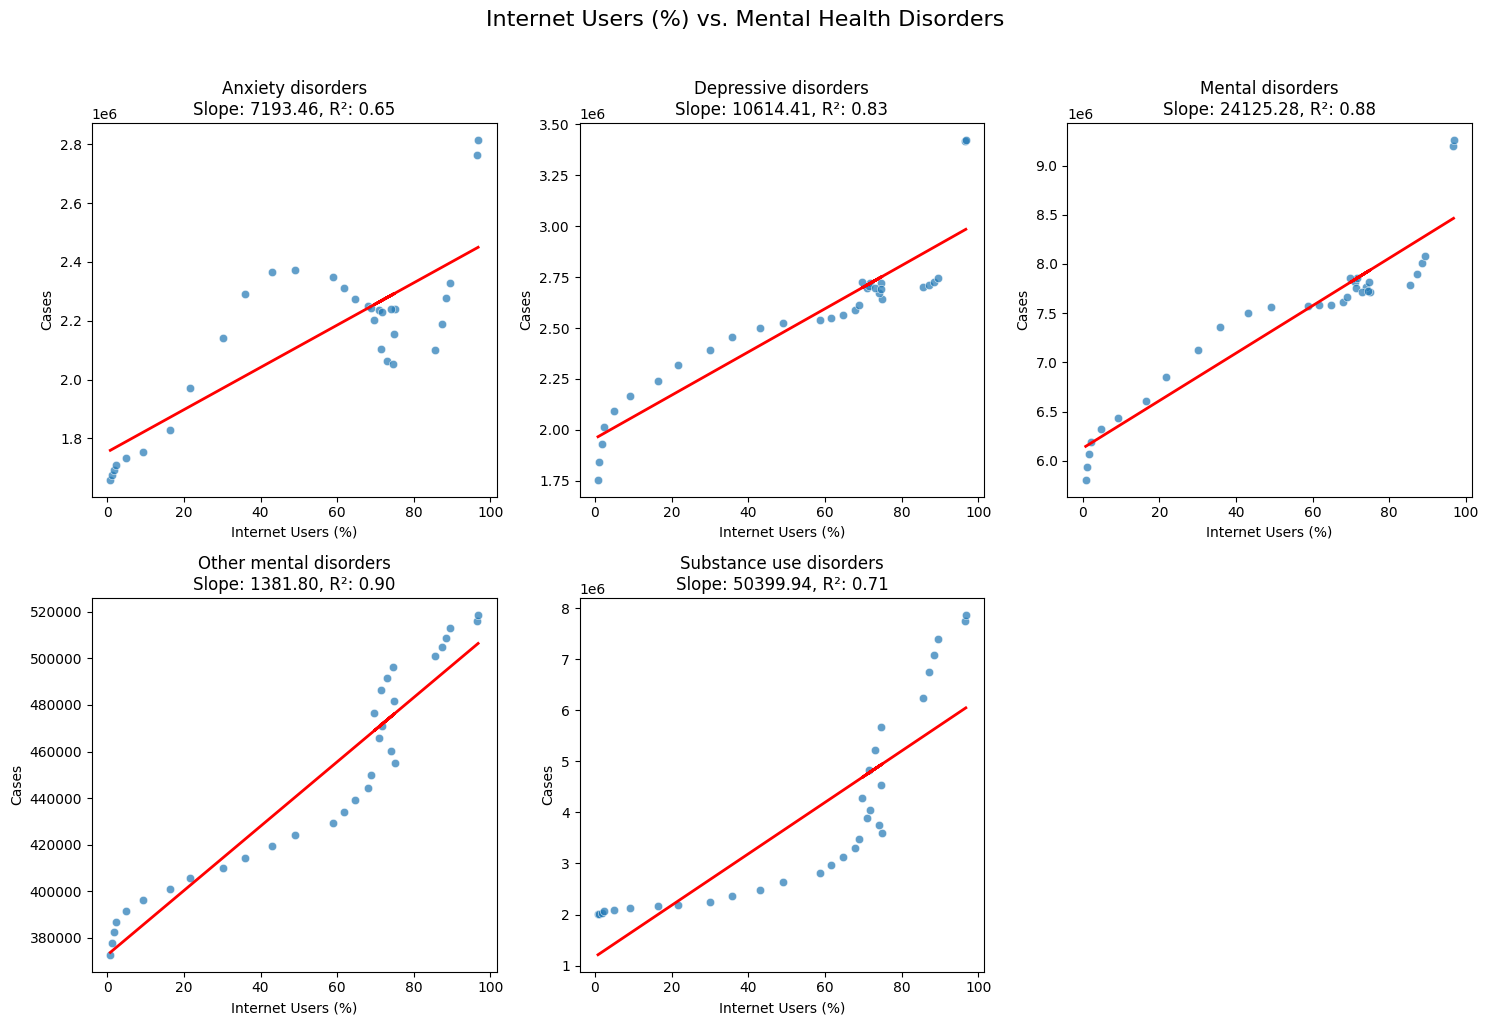


=== Regression Results Summary ===
                                Slope     Intercept  R-squared           MSE
Anxiety disorders         7193.459890  1.753718e+06   0.647895  2.721184e+10
Depressive disorders     10614.411880  1.957840e+06   0.834403  2.163640e+10
Mental disorders         24125.282783  6.129229e+06   0.882503  7.498457e+10
Other mental disorders    1381.801519  3.726785e+05   0.904643  1.947515e+08
Substance use disorders  50399.944273  1.172487e+06   0.708107  1.013212e+12


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats

# Define the mental health disorder columns
disorders = [
    'Anxiety disorders',
    'Depressive disorders',
    'Mental disorders',
    'Other mental disorders',
    'Substance use disorders'
]

# Initialize a dictionary to store results
results = {}

# Set up the plot
plt.figure(figsize=(15, 10))
plt.suptitle('Internet Users (%) vs. Mental Health Disorders', y=1.02, fontsize=16)

# Loop through each disorder and perform regression
for i, disorder in enumerate(disorders, 1):
    # Prepare data
    X = df_merged_dalys[['Internet Users (%)']].values
    y = df_merged_dalys[disorder].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calculate metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    slope = model.coef_[0]
    intercept = model.intercept_

    # Store results
    results[disorder] = {
        'Slope': slope,
        'Intercept': intercept,
        'R-squared': r2,
        'MSE': mse
    }

    # Create subplot
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df_merged_dalys['Internet Users (%)'], y=df_merged_dalys[disorder], alpha=0.7)
    plt.plot(X, y_pred, color='red', linewidth=2)
    plt.title(f'{disorder}\nSlope: {slope:.2f}, R²: {r2:.2f}')
    plt.xlabel('Internet Users (%)')
    plt.ylabel('Cases')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Display results in a dataframe
results_df = pd.DataFrame(results).T
print("\n=== Regression Results Summary ===")
print(results_df)

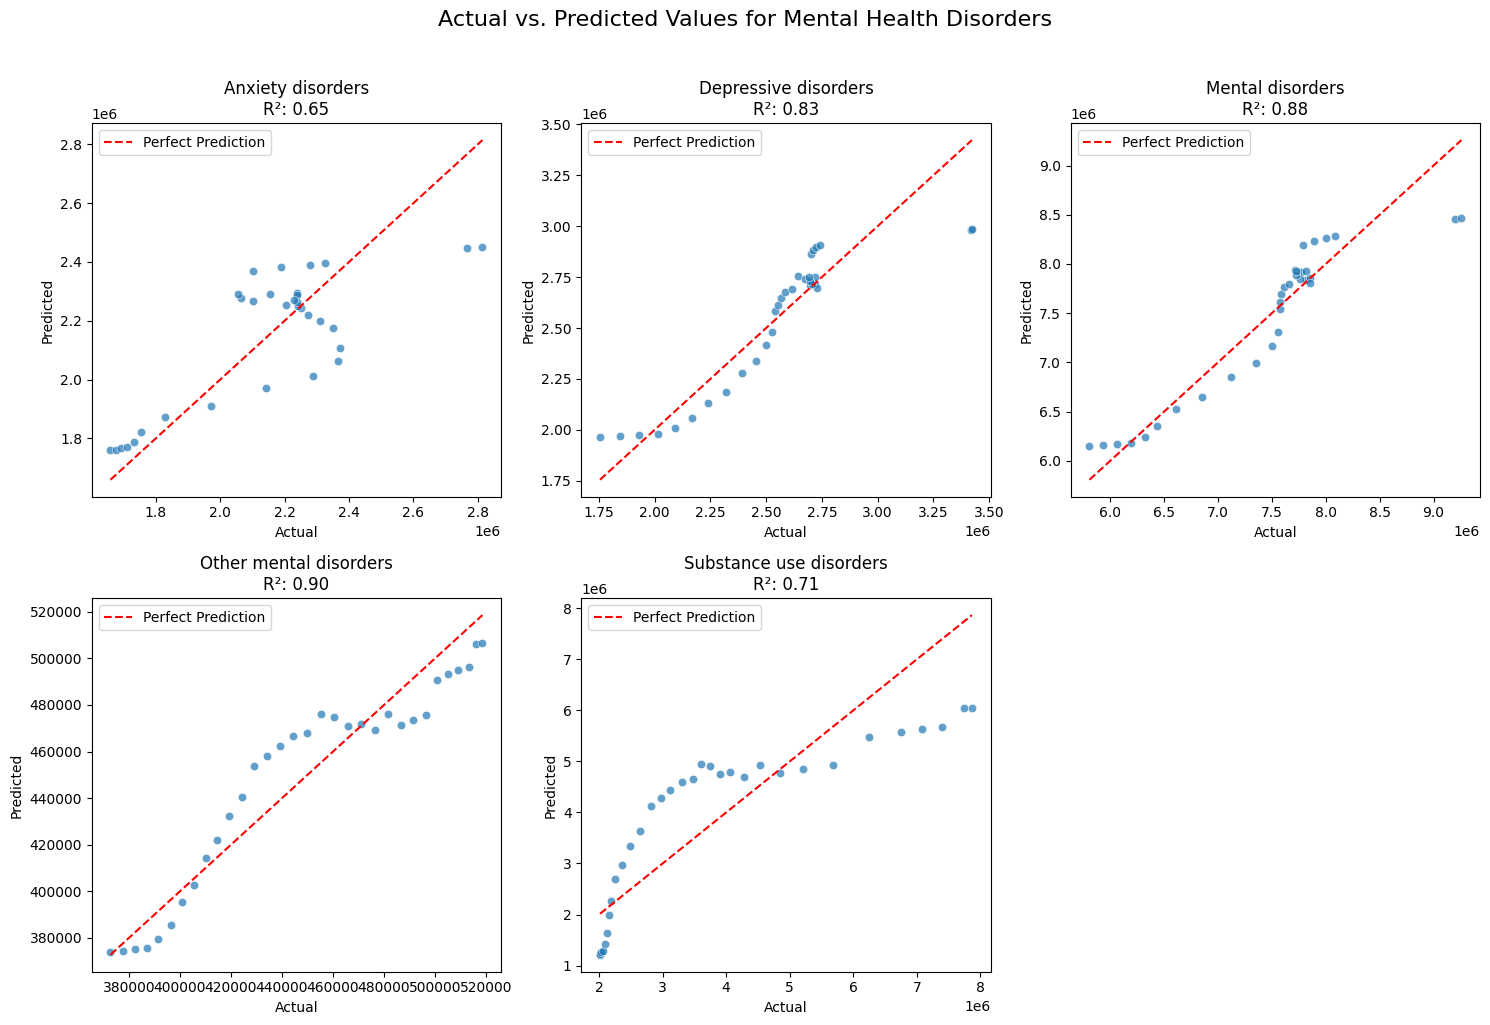

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define the mental health disorder columns
disorders = [
    'Anxiety disorders',
    'Depressive disorders',
    'Mental disorders',
    'Other mental disorders',
    'Substance use disorders'
]

# Initialize a dictionary to store results
results = {}

# Set up the plot
plt.figure(figsize=(15, 10))
plt.suptitle('Actual vs. Predicted Values for Mental Health Disorders', y=1.02, fontsize=16)

# Loop through each disorder and perform regression
for i, disorder in enumerate(disorders, 1):
    # Prepare data
    X = df_merged_dalys[['Internet Users (%)']].values
    y = df_merged_dalys[disorder].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calculate metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    slope = model.coef_[0]
    intercept = model.intercept_

    # Store results
    results[disorder] = {
        'Slope': slope,
        'Intercept': intercept,
        'R-squared': r2,
        'MSE': mse
    }

    # Create subplot for Actual vs. Predicted
    plt.subplot(2, 3, i)
    sns.scatterplot(x=y, y=y_pred, alpha=0.7)
    plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Perfect Prediction')
    plt.title(f'{disorder}\nR²: {r2:.2f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

## Internet and Deaths

# Regression Analysis: Internet Users (%) vs. Mental Health Disorder Deaths

## Key Findings
| Disorder Category         | Slope (Coefficient) | Intercept   | R-squared (R²) | MSE               | Interpretation                          |
|---------------------------|---------------------|-------------|----------------|-------------------|-----------------------------------------|
| **Mental Disorders**      | 0.189               | 24.21       | 0.876          | 4.92              | Strong positive relationship            |
| **Substance Use Disorders**| 657.29            | 4,311.71    | 0.764          | 1.29×10⁸          | Very large effect size                  |

---

## Interpretation of Results

### 1. Mental Disorders
- **Slope (0.189):** Each 1% increase in Internet Users is associated with a **0.189-unit increase** in mental disorder deaths.
- **High R² (0.876):** 87.6% of death variance is explained by Internet penetration.
- **Practical Impact:**  
  - A 10% rise in Internet Users → **+1.89 deaths** (per 100,000 population if units are standardized).
  - **Context:** This suggests Internet access may correlate with increased mental health risks, though causation requires further study.

### 2. Substance Use Disorders
- **Slope (657.29):** Dramatically larger effect size - each 1% Internet increase links to **~657 more substance-use deaths**.
- **Moderate R² (0.764):** 76.4% of variance explained, indicating other factors (e.g., drug policies) also contribute.
- **Critical Note:**  
  - Absolute death counts are much higher than general mental disorders.
  - Possible mechanisms: Online drug markets, social media influences on substance use.

---

## Policy Implications
🚨 **Key Concerns:**
- **Substance Use Disorders:** The massive slope (657 deaths/1% Internet) demands urgent investigation into digital risk factors.
- **Mental Disorders:** Smaller but consistent effect suggests preventive measures could help.

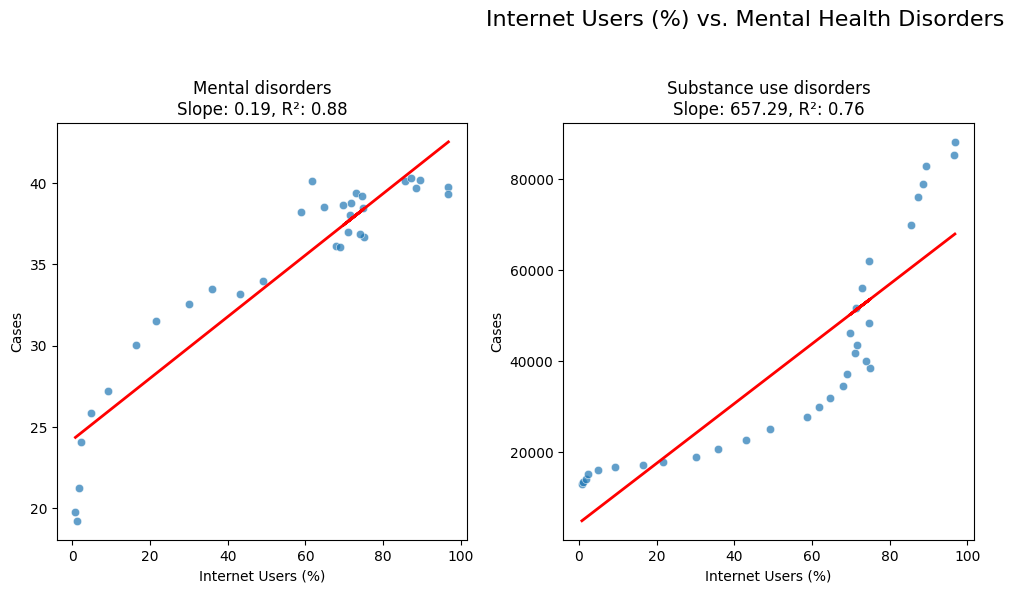


=== Regression Results Summary ===
                              Slope    Intercept  R-squared           MSE
Mental disorders           0.189403    24.210462   0.875859  4.920039e+00
Substance use disorders  657.289266  4311.711364   0.764494  1.287824e+08


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats

# Define the mental health disorder columns
disorders = [
    'Mental disorders',
    'Substance use disorders'
]

# Initialize a dictionary to store results
results = {}

# Set up the plot
plt.figure(figsize=(15, 10))
plt.suptitle('Internet Users (%) vs. Mental Health Disorders', y=1.02, fontsize=16)

# Loop through each disorder and perform regression
for i, disorder in enumerate(disorders, 1):
    # Prepare data
    X = df_merged_deaths[['Internet Users (%)']].values
    y = df_merged_deaths[disorder].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calculate metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    slope = model.coef_[0]
    intercept = model.intercept_

    # Store results
    results[disorder] = {
        'Slope': slope,
        'Intercept': intercept,
        'R-squared': r2,
        'MSE': mse
    }

    # Create subplot
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df_merged_deaths['Internet Users (%)'], y=df_merged_deaths[disorder], alpha=0.7)
    plt.plot(X, y_pred, color='red', linewidth=2)
    plt.title(f'{disorder}\nSlope: {slope:.2f}, R²: {r2:.2f}')
    plt.xlabel('Internet Users (%)')
    plt.ylabel('Cases')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Display results in a dataframe
results_df = pd.DataFrame(results).T
print("\n=== Regression Results Summary ===")
print(results_df)

## Internet and Obesity

# Regression Analysis: Internet Users (%) vs. Obesity Prevalence

## Key Results Summary
| Metric               | Value               | Interpretation                                                                 |
|----------------------|---------------------|--------------------------------------------------------------------------------|
| **Slope**            | 356,997.45         | Each 1% Internet increase → ~357,000 more obese individuals                   |
| **Intercept**        | 18,422,630         | Baseline obesity count at 0% Internet (theoretical)                           |
| **R-squared (R²)**   | 0.939              | 93.9% of obesity variance explained by Internet penetration                   |
| **MSE**              | 8.28 × 10¹²        | Typical prediction error: ±2.88 million people                                |

---

## Detailed Interpretation

### 1. Magnitude of Effect
- **Staggering Slope:**  
  A 10% increase in Internet Users correlates with **3.57 million more obese individuals**.
  - *Context:* This suggests digital lifestyles may significantly impact weight management.

### 2. Model Fit
- **Near-Perfect R² (0.939):**  
  Internet adoption explains almost all variability in obesity trends in your dataset.
  - *Caveat:* Likely reflects concurrent societal changes (sedentary jobs, food delivery apps).

### 3. Baseline Obesity
- **Intercept (18.4M):**  
  The model predicts 18.4 million obese individuals without Internet access.  
  - *Note:* This extrapolation beyond data range may not reflect reality.


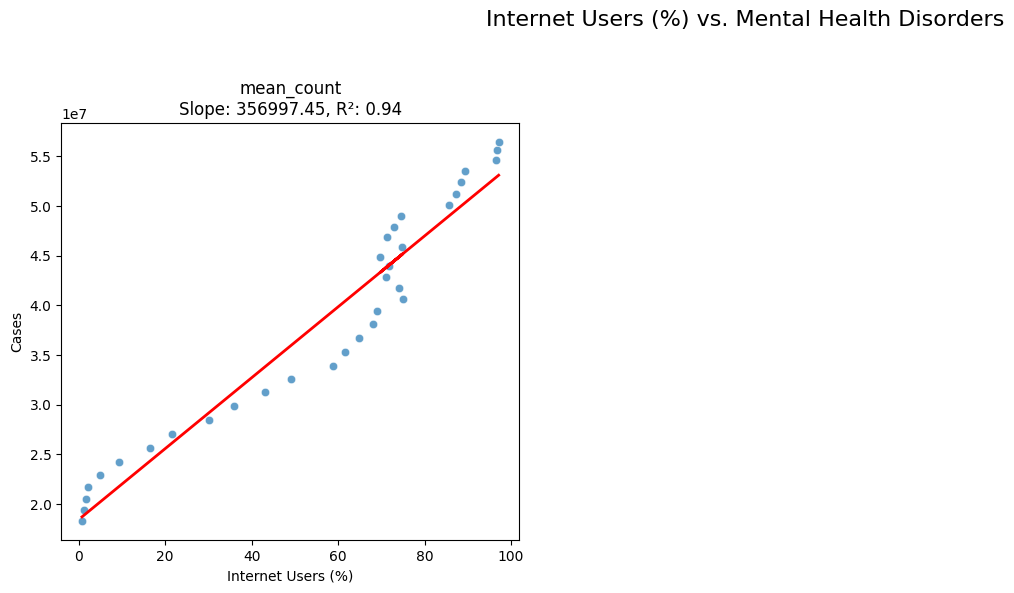


=== Regression Results Summary ===
                    Slope     Intercept  R-squared           MSE
mean_count  356997.448298  1.842263e+07   0.938552  8.279308e+12


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats

# Assuming your data is already loaded in a dataframe called 'df_merged_obesity'
# If not, you can load it like this:
# df_merged_obesity = pd.read_csv('your_data.csv')

# Define the mental health disorder columns
disorders = [
    'mean_count'
]

# Initialize a dictionary to store results
results = {}

# Set up the plot
plt.figure(figsize=(15, 10))
plt.suptitle('Internet Users (%) vs. Mental Health Disorders', y=1.02, fontsize=16)

# Loop through each disorder and perform regression
for i, disorder in enumerate(disorders, 1):
    # Prepare data
    X = df_merged_obesity[['Internet Users (%)']].values
    y = df_merged_obesity[disorder].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calculate metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    slope = model.coef_[0]
    intercept = model.intercept_

    # Store results
    results[disorder] = {
        'Slope': slope,
        'Intercept': intercept,
        'R-squared': r2,
        'MSE': mse
    }

    # Create subplot
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df_merged_obesity['Internet Users (%)'], y=df_merged_obesity[disorder], alpha=0.7)
    plt.plot(X, y_pred, color='red', linewidth=2)
    plt.title(f'{disorder}\nSlope: {slope:.2f}, R²: {r2:.2f}')
    plt.xlabel('Internet Users (%)')
    plt.ylabel('Cases')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Display results in a dataframe
results_df = pd.DataFrame(results).T
print("\n=== Regression Results Summary ===")
print(results_df)

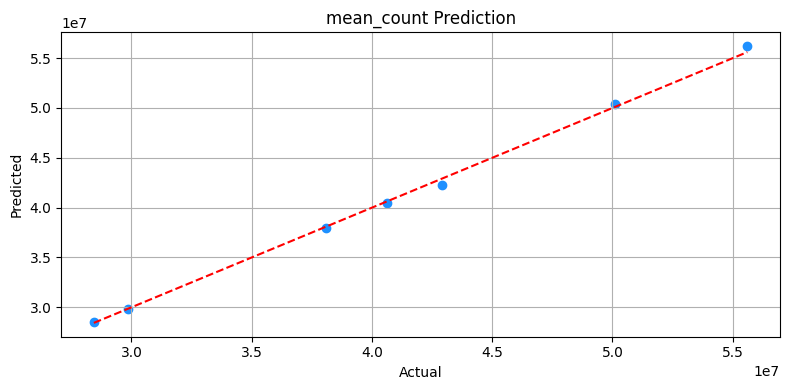

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# --- Define features and targets ---
features = ['year', 'Internet Users (%)']
targets = [
    'mean_count'
]

X = df_merged_obesity[features]

# --- Train and evaluate regression model for each target ---
results = {}

for target in targets:
    y = df_merged_obesity[target]

    # Split the data (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5

    # Save results
    results[target] = {
        'R2 Score': r2,
        'MAE': mae,
        'RMSE': rmse
    }

    # --- Optional: Visualize predictions ---
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test, y_pred, color='dodgerblue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'{target} Prediction')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

---
# **Figures and Plots**

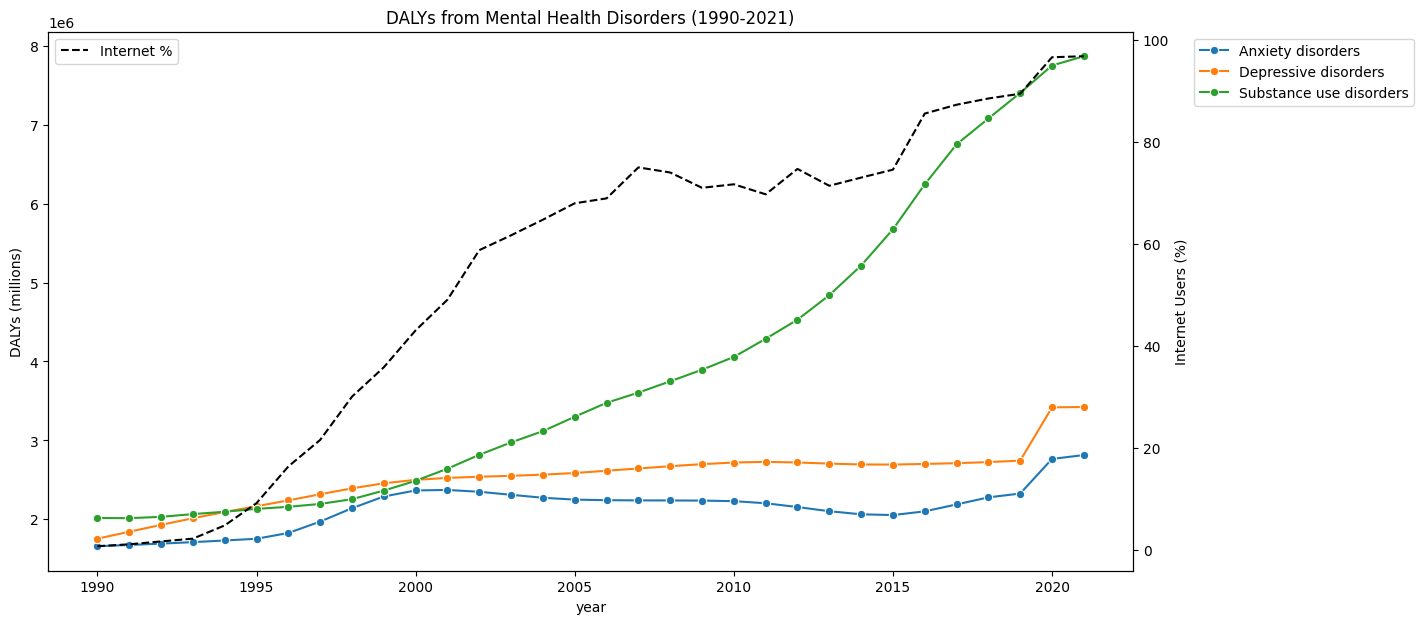

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
disorders = ['Anxiety disorders', 'Depressive disorders', 'Substance use disorders']
for disorder in disorders:
    sns.lineplot(x='year', y=disorder, data=df_merged_dalys, label=disorder, marker='o')
plt.title("DALYs from Mental Health Disorders (1990-2021)")
plt.ylabel("DALYs (millions)")
plt.legend(bbox_to_anchor=(1.05,1))
plt.twinx()
sns.lineplot(x='year', y='Internet Users (%)', data=df_merged_dalys, color='black', label='Internet %', linestyle='--')
plt.ylabel("Internet Users (%)")
plt.show()

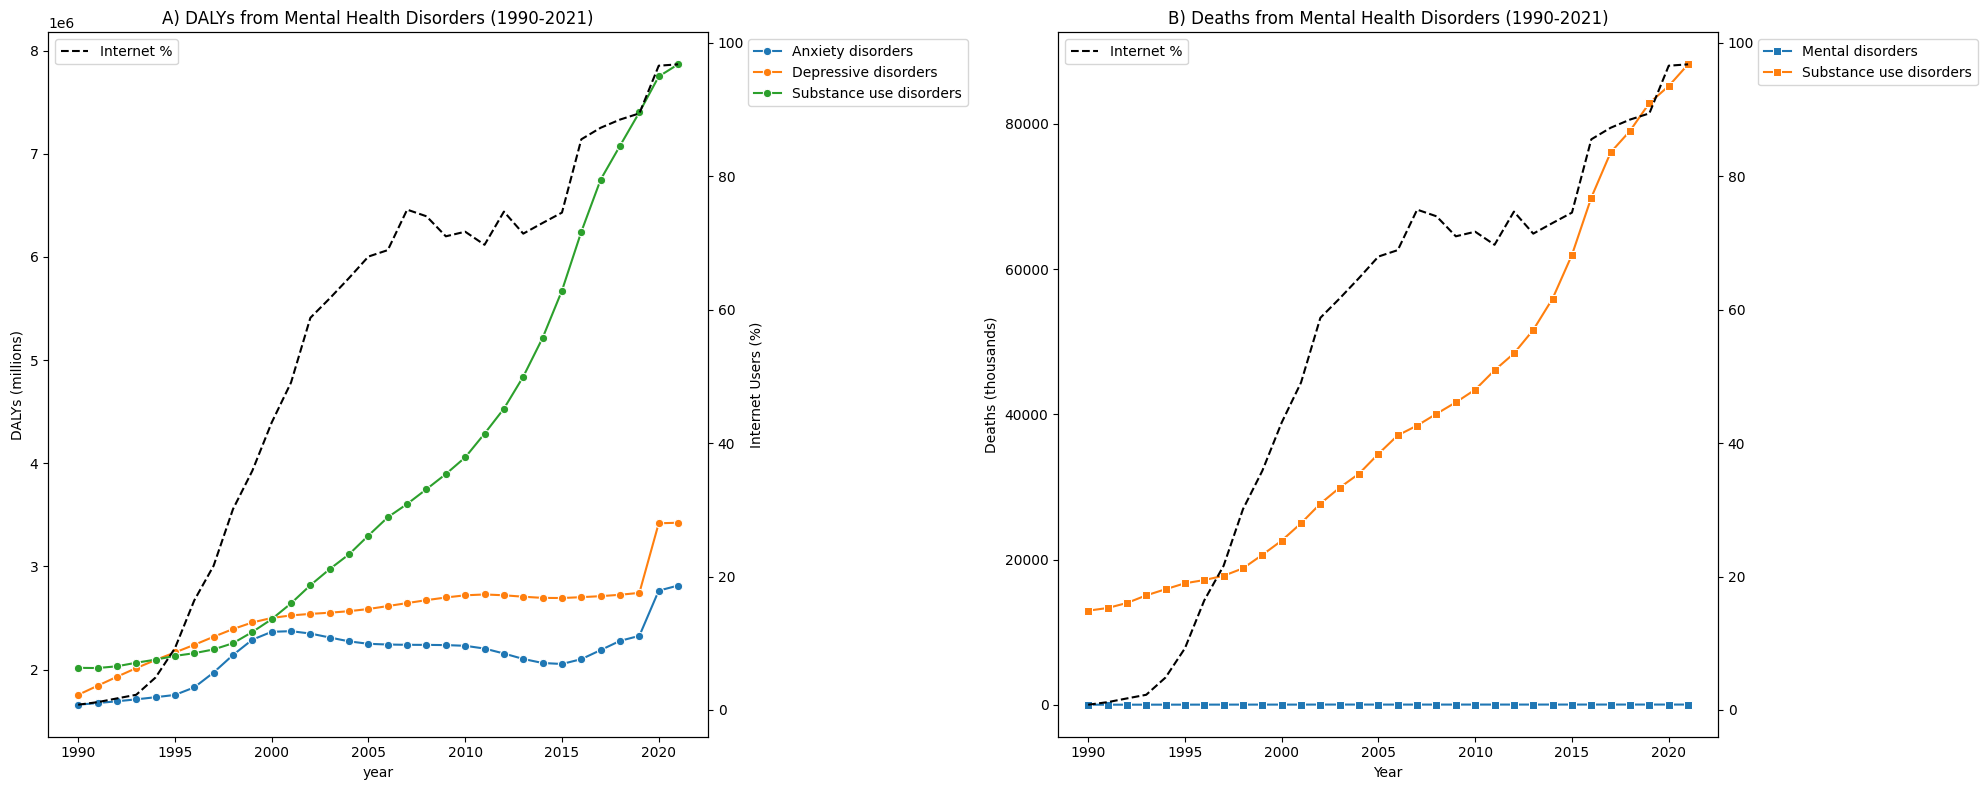

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharex=True)

# --- Plot 1: DALYs ---
disorders_dalys = ['Anxiety disorders', 'Depressive disorders', 'Substance use disorders']
for disorder in disorders_dalys:
    sns.lineplot(x='year', y=disorder, data=df_merged_dalys,
                 label=disorder, marker='o', ax=ax1)
ax1.set_title("A) DALYs from Mental Health Disorders (1990-2021)")
ax1.set_ylabel("DALYs (millions)")
ax1.legend(bbox_to_anchor=(1.05, 1))

# Add internet adoption to right axis
ax1b = ax1.twinx()
sns.lineplot(x='year', y='Internet Users (%)', data=df_merged_dalys,
             color='black', label='Internet %', linestyle='--', ax=ax1b)
ax1b.set_ylabel("Internet Users (%)")

# --- Plot 2: Deaths ---
disorders_deaths = ['Mental disorders', 'Substance use disorders']  # Replace with actual column names
for disorder in disorders_deaths:
    sns.lineplot(x='year', y=disorder, data=df_merged_deaths,
                 label=disorder.replace('_', ' '), marker='s', ax=ax2)
ax2.set_title("B) Deaths from Mental Health Disorders (1990-2021)")
ax2.set_ylabel("Deaths (thousands)")
ax2.set_xlabel("Year")
ax2.legend(bbox_to_anchor=(1.05, 1))

# Add internet adoption to deaths plot (same scale as above)
ax2b = ax2.twinx()
sns.lineplot(x='year', y='Internet Users (%)', data=df_merged_deaths,
             color='black', label='Internet %', linestyle='--', ax=ax2b)
ax2b.set_ylabel("")

# Improve layout
plt.tight_layout()
plt.show()

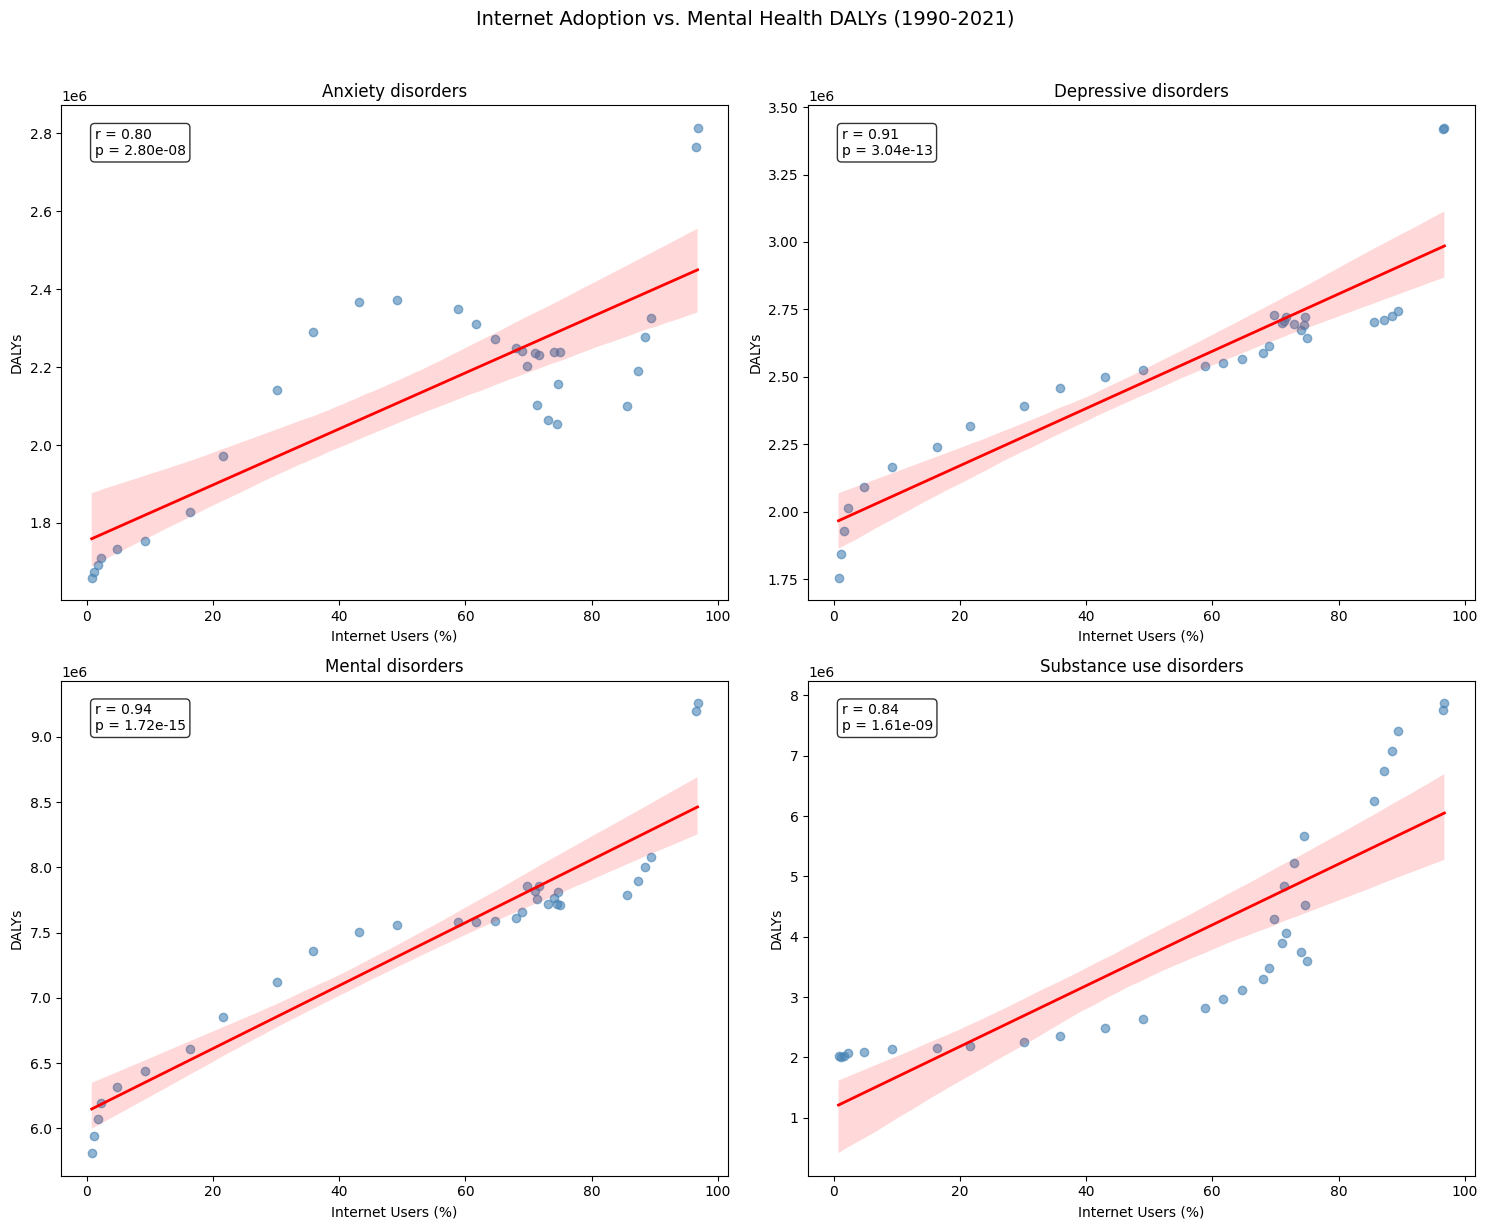

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr

# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Internet Adoption vs. Mental Health DALYs (1990-2021)', y=1.02, fontsize=14)
axes = axes.flatten()

# Columns to plot
disorders = ["Anxiety disorders", "Depressive disorders",
             "Mental disorders", "Substance use disorders"]

for i, disorder in enumerate(disorders):
    # Calculate correlation
    data = df_merged_dalys.dropna(subset=[disorder, "Internet Users (%)"])
    r, p = pearsonr(data["Internet Users (%)"], data[disorder])

    # Create scatter plot with regression
    sns.regplot(
        x="Internet Users (%)",
        y=disorder,
        data=data,
        ax=axes[i],
        scatter_kws={'alpha': 0.6, 'color': 'steelblue'},
        line_kws={'color': 'red', 'linewidth': 2}
    )

    # Annotate with correlation info
    axes[i].annotate(
        f'r = {r:.2f}\np = {p:.2e}',
        xy=(0.05, 0.9),
        xycoords='axes fraction',
        bbox=dict(boxstyle='round', fc='white', alpha=0.8)
    )
    axes[i].set_title(disorder)
    axes[i].set_ylabel('DALYs')

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

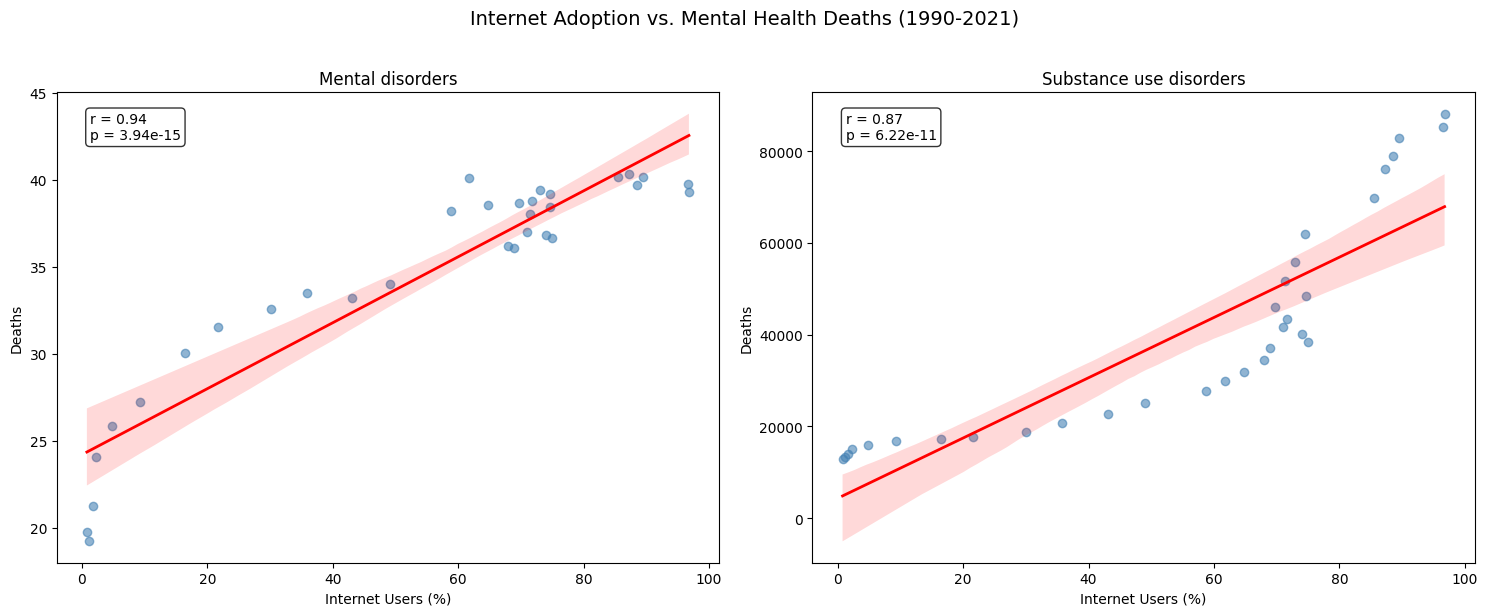

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr

# Set up the subplot grid
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Internet Adoption vs. Mental Health Deaths (1990-2021)', y=1.02, fontsize=14)
axes = axes.flatten()

# Columns to plot
disorders = ["Mental disorders", "Substance use disorders"]

for i, disorder in enumerate(disorders):
    # Calculate correlation
    data = df_merged_deaths.dropna(subset=[disorder, "Internet Users (%)"])
    r, p = pearsonr(data["Internet Users (%)"], data[disorder])

    # Create scatter plot with regression
    sns.regplot(
        x="Internet Users (%)",
        y=disorder,
        data=data,
        ax=axes[i],
        scatter_kws={'alpha': 0.6, 'color': 'steelblue'},
        line_kws={'color': 'red', 'linewidth': 2}
    )

    # Annotate with correlation info
    axes[i].annotate(
        f'r = {r:.2f}\np = {p:.2e}',
        xy=(0.05, 0.9),
        xycoords='axes fraction',
        bbox=dict(boxstyle='round', fc='white', alpha=0.8)
    )
    axes[i].set_title(disorder)
    axes[i].set_ylabel('Deaths')

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

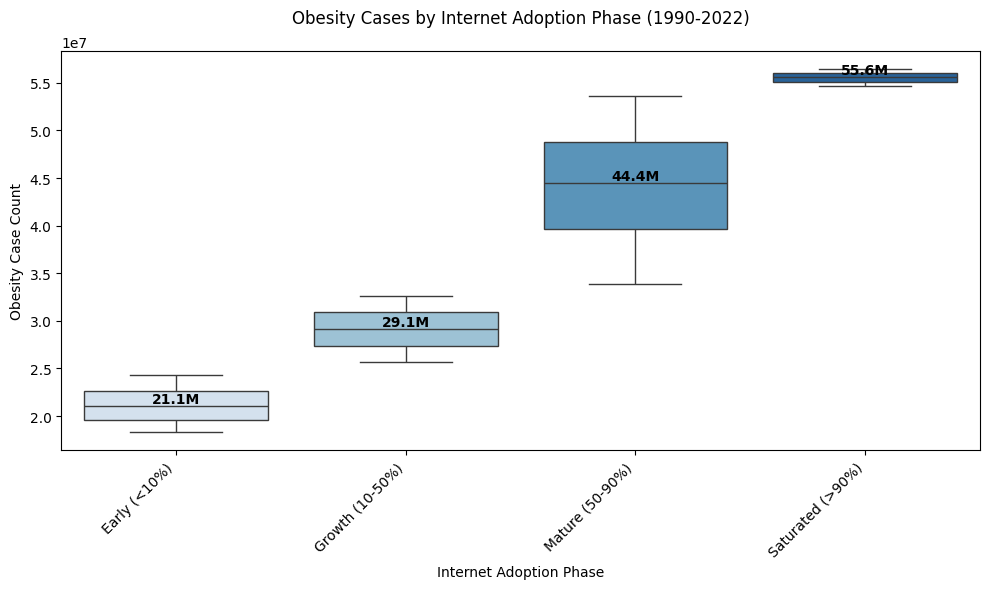

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create adoption phases
df_merged_obesity['phase'] = pd.cut(df_merged_obesity['Internet Users (%)'],
                    bins=[0,10,50,90,100],
                    labels=['Early (<10%)', 'Growth (10-50%)',
                           'Mature (50-90%)', 'Saturated (>90%)'])

plt.figure(figsize=(10,6))
sns.boxplot(
    x='phase',
    y='mean_count',
    data=df_merged_obesity,
    hue='phase',  # Assign hue to x variable
    palette='Blues',
    dodge=False,  # Prevent automatic hue dodge
    legend=False  # Suppress redundant legend
)

# Customize plot
plt.title("Obesity Cases by Internet Adoption Phase (1990-2022)", pad=20)
plt.ylabel("Obesity Case Count")
plt.xlabel("Internet Adoption Phase")
plt.xticks(rotation=45, ha='right')  # Improve x-axis readability

# Add value annotations
ax = plt.gca()
for i, phase in enumerate(df_merged_obesity['phase'].cat.categories):
    subset = df_merged_obesity[df_merged_obesity['phase'] == phase]['mean_count']
    median = subset.median()
    ax.text(i, median, f'{median/1e6:.1f}M',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()